In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/csvs/dkpes.csv')
df.head(10)

,index,Signal-inhibition,3-Keto,3-Hydroxy,12-Keto,12-Hydroxy,19-Methyl,18-Methyl,Sulfate-Ester,Sulfate-Oxygens,...,FitTverskyCombo,FitTversky,FitColorTversky,RefTverskyCombo,RefTversky,RefColorTversky,ScaledColor,ComboScore,ColorScore,Overlap
0,ENE4,0.905,1,0,0,1,1,1,1,3,...,1.624,0.932,0.692,1.811,0.951,0.860,0.872,1.761,-9.590,1286.317
1,ZINC72400307,0.904,0,0,0,1,1,1,1,3,...,1.401,0.888,0.513,1.579,0.901,0.678,0.691,1.499,-7.596,1218.799
2,ENE3,0.897,1,0,0,1,1,1,1,3,...,1.704,0.970,0.734,1.905,0.992,0.912,0.925,1.887,-10.171,1341.629
3,ENE1,0.893,1,0,1,0,1,1,1,3,...,1.822,0.976,0.846,1.985,1.002,0.983,0.992,1.970,-10.911,1357.732
4,ENE2,0.845,1,0,1,0,1,1,1,3,...,1.786,0.967,0.820,1.949,0.997,0.953,0.961,1.925,-10.574,1351.912
5,ZINC12494532,0.741,0,0,0,0,0,0,1,3,...,1.280,0.815,0.465,1.308,0.805,0.503,0.506,1.186,-5.562,1086.704
6,ZINC35044325,0.739,0,1,0,0,1,1,0,3,...,1.497,0.853,0.644,1.632,0.883,0.749,0.756,1.522,-8.312,1194.401
7,ZINC04095893,0.722,0,0,0,0,1,1,0,3,...,1.417,0.835,0.583,1.543,0.866,0.677,0.683,1.422,-7.515,1172.979
8,ZINC01532179,0.686,0,0,0,0,0,0,1,3,...,1.896,1.143,0.752,0.959,0.586,0.373,0.363,0.995,-3.988,770.823
9,ZINC70666191,0.627,0,0,0,1,1,1,0,0,...,1.278,0.851,0.427,1.489,0.925,0.564,0.574,1.371,-6.316,1256.029


In [3]:
y = df['Signal-inhibition'].values
fgroup_cols = ['3-Keto', '3-Hydroxy', '12-Keto',
               '12-Hydroxy', '19-Methyl', '18-Methyl', 'Sulfate-Ester',
               'Sulfate-Oxygens', 'C4-C5-DB', 'C6-C7-DB', 'Sulfur']
X = df[fgroup_cols].values

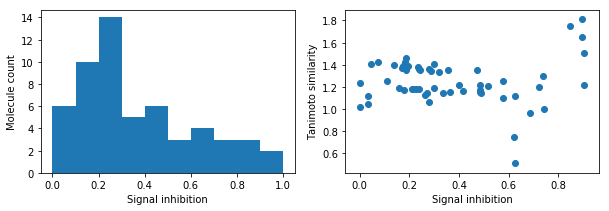

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))

ax[0].hist(y, bins=np.arange(0, 1.1, 0.1))
ax[0].set_ylabel('Molecule count')
ax[0].set_xlabel('Signal inhibition')
ax[1].scatter(y, df['TanimotoCombo'].values)
ax[1].set_ylabel('Tanimoto similarity')
ax[1].set_xlabel('Signal inhibition')
plt.show()

In [5]:
print('The top 10 most active compounds:')
df['index'][:10]

The top 10 most active compounds:


0            ENE4
1    ZINC72400307
2            ENE3
3            ENE1
4            ENE2
5    ZINC12494532
6    ZINC35044325
7    ZINC04095893
8    ZINC01532179
9    ZINC70666191
Name: index, dtype: object

In [6]:
print('The top 10 least active compounds:')
df['index'][-10:]

The top 10 least active compounds:


46    ZINC06036223
47    ZINC59528245
48    ZINC06036225
49      16409-34-0
50    ZINC03881406
51    ZINC04025723
52    ZINC04097469
53    ZINC03876071
54    ZINC40576706
55    ZINC22058386
Name: index, dtype: object

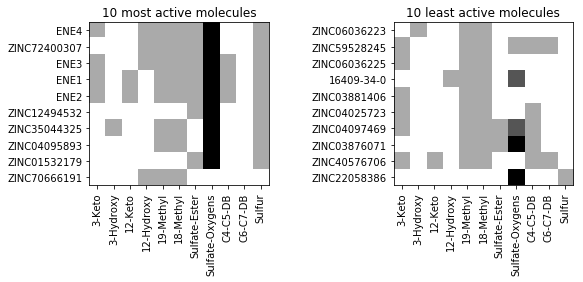

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))

ax[0].imshow(X[:10], cmap='binary')
ax[0].set_title('10 most active molecules')
plt.sca(ax[0])
plt.xticks(range(len(fgroup_cols)), 
           fgroup_cols, rotation='vertical')
plt.yticks(range(10), df['index'][:10])

ax[1].imshow(X[-10:], cmap='binary')
ax[1].set_title('10 least active molecules')
plt.sca(ax[1])
plt.xticks(range(len(fgroup_cols)),
           fgroup_cols, rotation='vertical')
plt.yticks(range(10), df['index'][-10:])

plt.show()

In [8]:
y_binary = np.where(y >= 0.6, 1, 0)
np.sum(y_binary)

12

- install graphviz (http://www.graphviz.org)

In [9]:
tree.DecisionTreeClassifier?

Object `tree.DecisionTreeClassifier` not found.


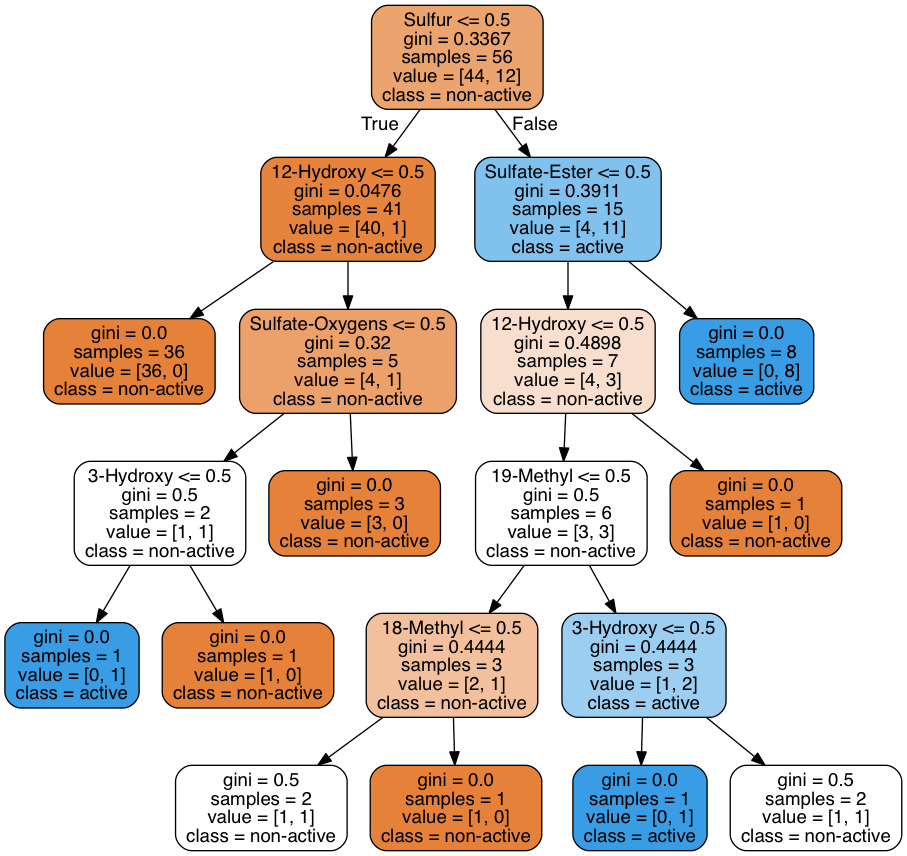

In [10]:
import pydotplus 
from sklearn import tree
from IPython.display import Image  


clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y_binary)

dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=fgroup_cols,
                                class_names=['non-active', 'active'],
                                filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf("tree.pdf") 
Image(graph.create_png())  

 1) Sulfur                         0.356299
 2) Sulfate-Ester                  0.189997
 3) Sulfate-Oxygens                0.182911
 4) 12-Hydroxy                     0.076709
 5) 3-Hydroxy                      0.047363
 6) 19-Methyl                      0.034968
 7) 18-Methyl                      0.033386
 8) 3-Keto                         0.032528
 9) 12-Keto                        0.022941
10) C4-C5-DB                       0.021945
11) C6-C7-DB                       0.000951


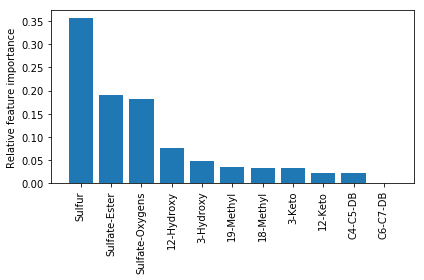

In [11]:
from sklearn.ensemble import RandomForestClassifier

feature_labels = np.array(fgroup_cols)

forest = RandomForestClassifier(n_estimators=1000,
                                random_state=0,
                                n_jobs=-1)

forest.fit(X, y_binary)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feature_labels[indices[f]], 
                            importances[indices[f]]))

plt.bar(range(X.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X.shape[1]), 
           feature_labels[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.ylabel('Relative feature importance')
plt.tight_layout()
#plt.savefig('./random_forest.png', dpi=300)
plt.show()

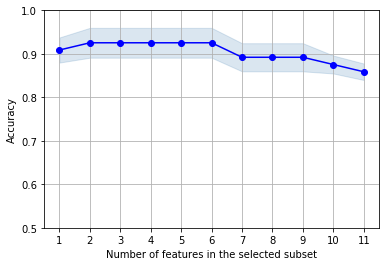

In [12]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

sfs = SFS(classifier, 
          k_features=1, 
          forward=False, 
          floating=False, 
          scoring='accuracy',
          verbose=0,
          cv=5)

sfs = sfs.fit(X, y_binary)

fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.ylim([0.5, 1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features in the selected subset')
plt.grid()
plt.show()

In [13]:
sfs.subsets_[2]

{'avg_score': 0.92545454545454553,
 'cv_scores': array([ 1.        ,  1.        ,  0.81818182,  0.90909091,  0.9       ]),
 'feature_idx': (10, 6)}

In [14]:
sfs.subsets_[2]['feature_idx']

(10, 6)

In [15]:
feature_labels[list(sfs.subsets_[2]['feature_idx'])]

array(['Sulfur', 'Sulfate-Ester'],
      dtype='<U15')